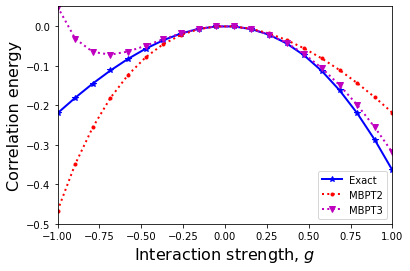

In [23]:
#!/usr/bin/python
from sympy import *
from pylab import *
import matplotlib.pyplot as plt

below_fermi = (0,1,2,3)
above_fermi = (4,5,6,7)
states = [(1,1),(1,-1),(2,1),(2,-1),(3,1),(3,-1),(4,1),(4,-1)]
g = Symbol('g')


def h0(p,q):
    if p == q:
        p1, s1 = states[p]
        return (p1 - 1)
    else:
        return 0

def f(p,q):
    if p == q:
        return 0
    s = h0(p,q)
    for i in below_fermi:
        s += assym(p,i,q,i)
        return s


def assym(p,q,r,s):
    p1, s1 = states[p]
    p2, s2 = states[q]
    p3, s3 = states[r]
    p4, s4 = states[s]

    if p1 != p2 or p3 != p4:
        return 0
    if s1 == s2 or s3 == s4:
        return 0
    if s1 == s3 and s2 == s4:
        return -g/2.
    if s1 == s4 and s2 == s3:
        return g/2.

def eps(holes, particles):
    E = 0
    for h in holes:
        p, s = states[h]
        E += (p-1) - g/2
    for p in particles:
        p, s = states[p]
        E -= (p-1)
    return E


# Diagram 1
s1 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                s1 += 0.25*assym(a,b,i,j)*assym(i,j,a,b)/eps((i,j),(a,b))




# Diagram 3
s3 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for i in below_fermi:
                for j in below_fermi:
                    for k in below_fermi:
                        s3 += assym(i,j,a,b)*assym(a,c,j,k)*assym(b,k,c,i)/eps((i,j),(a,b))/eps((k,j),(a,c))

# Diagram 4
s4 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for d in above_fermi:
                for i in below_fermi:
                    for j in below_fermi:
                        s4 += 0.125*assym(i,j,a,b)*assym(a,b,c,d)*assym(c,d,i,j)/eps((i,j),(a,b))/eps((i,j),(c,d))

# Diagram 5
s5 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    for l in below_fermi:
                        s5 += 0.125*assym(i,j,a,b)*assym(k,l,i,j)*assym(a,b,k,l)/eps((i,j),(a,b))/eps((k,l),(a,b))

# Diagram 8 
s8 = 0
for a in above_fermi:
    for b in above_fermi:
        for i in below_fermi:
            for j in below_fermi:
                for k in below_fermi:
                    s8 -= 0.5*assym(i,j,a,b)*assym(a,b,i,k)*f(k,j)/eps((i,j),(a,b))/eps((i,k),(a,b))

# Diagram 9 
s9 = 0
for a in above_fermi:
    for b in above_fermi:
        for c in above_fermi:
            for i in below_fermi:
                for j in below_fermi:
                    s9 += 0.5*assym(i,j,a,b)*assym(a,c,i,j)*f(b,c)/eps((i,j),(a,b))/eps((i,j),(a,c))

ga = linspace(-1,1,20)
e1 = []
corr2 = []
corr3 = []

for g_val in ga:
    H1 = matrix([[2-g_val , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,     0],
                         [-g_val/2.,   4-g_val,  -g_val/2., -g_val/2.,    0., -g_val/2.],
                         [-g_val/2., -g_val/2.,    6-g_val,     0, -g_val/2., -g_val/2.],
                 [-g_val/2., -g_val/2.,      0,   6-g_val, -g_val/2., -g_val/2.],
                 [-g_val/2.,     0,  -g_val/2., -g_val/2.,   8-g_val, -g_val/2.],
                 [0    , -g_val/2.,  -g_val/2., -g_val/2., -g_val/2.,  10-g_val]])

    u1, v1 = linalg.eig(H1)
    e1.append(min(u1))
    corr2.append((s1).subs(g,g_val))
    corr3.append((s1+s3+s4+s5).subs(g,g_val))

exact = e1 - (2-ga)

plt.axis([-1,1,-0.5,0.05])
plt.xlabel(r'Interaction strength, $g$', fontsize=16)
plt.ylabel(r'Correlation energy', fontsize=16)
exact = plt.plot(ga, exact,'b-*',linewidth = 2.0, label = 'Exact')
mbpt2 = plt.plot(ga, corr2,'r:.', linewidth = 2.0, label = 'MBPT2')
mbpt3 = plt.plot(ga, corr3, 'm:v',linewidth = 2.0, label = 'MBPT3')
plt.legend()
plt.savefig('perturbationtheory.pdf', format='pdf')
plt.show()

In [24]:
print(corr3)

[0.0488888888888889, -0.0316430818998829, -0.0653314223276869, -0.0721092071206414, -0.0642577496533054, -0.0495666500220538, -0.0330827101356087, -0.0181217847556307, -0.00687677135187049, -0.000795029103693348, -0.000819381146390719, -0.00754584419303519, -0.0213291046738017, -0.0423543929354630, -0.0706872722072964, -0.106308625103258, -0.149139543216922, -0.199059220049532, -0.255917926398189, -0.319546485260771]
